In [1]:
import numpy as np
import pandas as pd

import os, sys
import random

try:
    os.chdir('CrowdInference')
    sys.path.append(os.getcwd())
except:
    pass

import crowd_inference.methods.dawid_skene as ds
import crowd_inference.methods.majority_vote as mv
import crowd_inference.methods.raykar as r
import crowd_inference.methods.raykar_boosting as rb
import crowd_inference.methods.raykar_plus_ds as rds
import crowd_inference.methods.classifier as cls
import benchmark as bm

from crowd_inference.truth_inference import NoFeaturesInference, TruthInference, WithFeaturesInference
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
from collections import defaultdict
import tests.data_provider as data
from tqdm.auto import tqdm

import seaborn as sns
sns.set()
sns.set(font_scale=1.2)


from importlib import reload

def reload_all():
    reload(ds)
    reload(r)
    reload(rb)
    reload(rds)
    reload(cls)
    reload(bm)

reload(data)

<module 'tests.data_provider' from '/Users/andrey/Documents/5Course/CrowdInference/tests/data_provider.py'>

In [2]:
music_data = data.MusicDataProvider()

Iter 00, logit: -7.202692
Iter 40, logit: -6.098567
Iter 80, logit: -6.090356
Iter 120, logit: -6.088232
Iter 160, logit: -6.087427
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
---------------
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.221320
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'pop'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'pop'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'pop'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' '

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

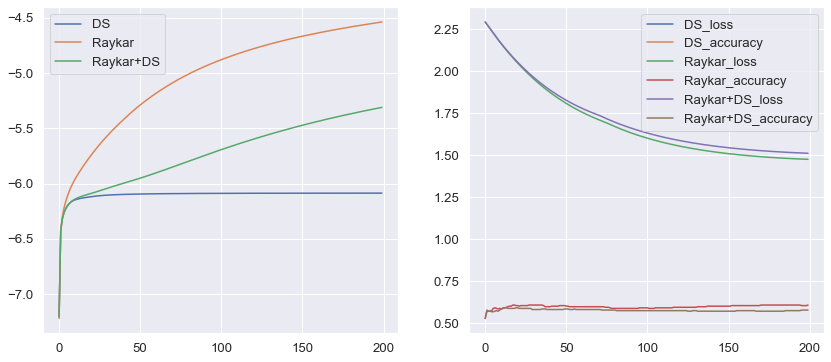

In [3]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300)

Number of data points: 700


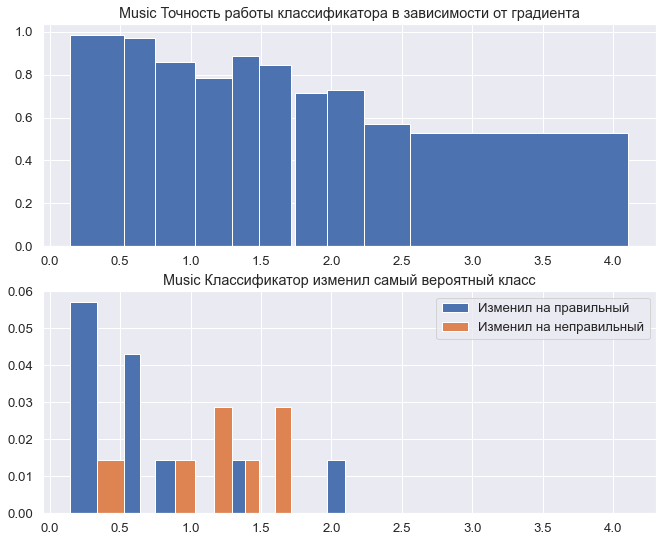

In [4]:
buckets, confidences, wrong, correct = bm.build_grad_hist(music_data, music_methods, music_points, 'Music', 70);
confidence_music = bm.get_confidence(buckets[0], confidences[0])

Iter 00, logit: -7.202692
Iter 40, logit: -6.098567
Iter 80, logit: -6.090356
Iter 120, logit: -6.088232
Iter 160, logit: -6.087427
[0.09993472 0.10313253 0.11092602 0.0991359  0.0947824  0.11122991
 0.06140385 0.12126823 0.09149714 0.1066893 ]
---------------
Label accuracy is 0.7757142857142857
--------------------------------------------------
Data has 125 features
Iter 00, logit: -7.221320
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'pop'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'pop'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'pop'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' '

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'hiphop' 'reggae']
['classical' 'reggae' 'country' 'metal' 

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'clas

['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
['classical' 'reggae' 'country' 'metal' 'classical' 'classical' 'pop'
 'disco' 'hiphop' 'reggae'] ['classical' 'pop' 'country' 'rock' 'classical' 'classical' 'pop' 'metal'
 'disco' 'reggae']
Average Raykar weight is 0.786408163265306
Classifier train accuracy is 0.78
Classifier test accuracy is 0.6066666666666667
Label accuracy is 0.7985714285714286
--------------------------------------------------
3
[('DS', 0.7757142857142857), ('Raykar', 0.8042857142857143), ('Raykar+DS', 0.7985714285714286)]


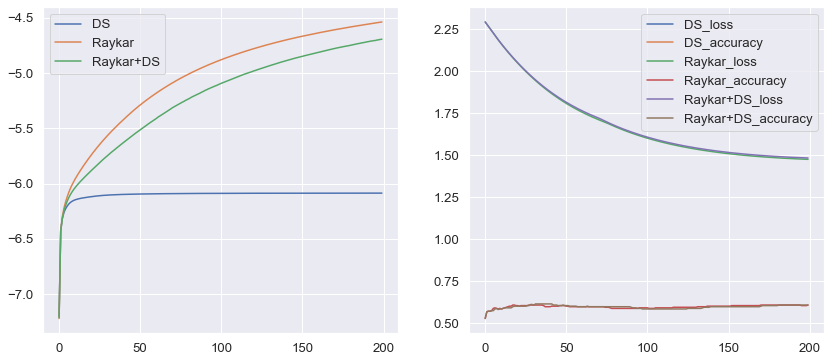

In [5]:
reload_all()
music_methods, music_points, advantages_matrix = bm.compare_methods(music_data, max_iter=200, lr=300, 
                                                                    confidence_estimator=confidence_music)

In [ ]:
music_points[music_points.task.isin(advantages_matrix[0][1])]

In [ ]:
bm.plots_for_point(music_points, music_data, music_methods, 58)

In [ ]:
reload_all()
bm.boosting_classifiers_distr(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])]) 

In [ ]:
music_points.classifier_rb.loc[507]

In [ ]:
reload_all()
bm.plot_all_gradients(music_points[music_points.task.isin(advantages_matrix[1][0])],
                         music_points[music_points.task.isin(advantages_matrix[0][1])])

In [ ]:
plt.plot(music_methods[1].losses)